In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:

from fbprophet import Prophet
from datetime import datetime
import pandas_datareader as pdr

카카오

In [29]:
start = datetime(2011, 1, 1)
end = datetime(2021, 1, 4)
kakao = pdr.DataReader('035720.KS', data_source='yahoo', start=start, end=end)
kakao.head()

High      Low     Open    Close    Volume     Adj Close
Date                                                                  
2011-01-03  77500.0  76100.0  77500.0  76800.0   67331.0  73410.820312
2011-01-04  79400.0  76800.0  76800.0  77600.0   77414.0  74175.515625
2011-01-05  78500.0  77000.0  77800.0  78000.0   55395.0  74557.867188
2011-01-06  79200.0  77600.0  78800.0  78200.0   44349.0  74749.031250
2011-01-07  80500.0  77900.0  78600.0  80100.0  131764.0  76565.179688

In [17]:
kakao.tail()

High       Low      Open     Close     Volume  Adj Close
Date                                                                    
2020-12-01  375000.0  369000.0  369500.0  374500.0   452723.0   374500.0
2020-12-02  375500.0  371000.0  375500.0  373000.0   440500.0   373000.0
2020-12-03  374000.0  369000.0  373000.0  374000.0   464371.0   374000.0
2020-12-04  392500.0  371000.0  374000.0  389500.0  1561745.0   389500.0
2020-12-07  395000.0  380500.0  395000.0  385000.0   888764.0   385000.0

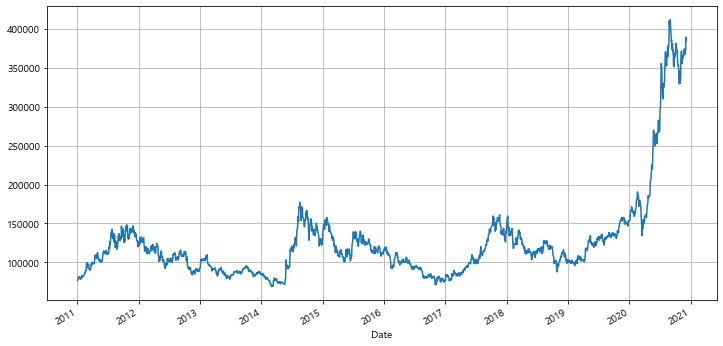

In [18]:
kakao.Close.plot(figsize=(12,6), grid=True)
plt.show()

In [19]:
kakao_trunc = kakao[:'2020-12-07']
kakao_trunc.tail()

High       Low      Open     Close     Volume  Adj Close
Date                                                                    
2020-12-01  375000.0  369000.0  369500.0  374500.0   452723.0   374500.0
2020-12-02  375500.0  371000.0  375500.0  373000.0   440500.0   373000.0
2020-12-03  374000.0  369000.0  373000.0  374000.0   464371.0   374000.0
2020-12-04  392500.0  371000.0  374000.0  389500.0  1561745.0   389500.0
2020-12-07  395000.0  380500.0  395000.0  385000.0   888764.0   385000.0

In [20]:
df = pd.DataFrame({'ds': kakao_trunc.index, 'y': kakao_trunc.Close})
df.reset_index(inplace=True)
del df['Date']
df.head()

ds        y
0 2011-01-03  76800.0
1 2011-01-04  77600.0
2 2011-01-05  78000.0
3 2011-01-06  78200.0
4 2011-01-07  80100.0

In [21]:
model = Prophet(daily_seasonality=True)
model.fit(df)

In [22]:
future = model.make_future_dataframe(periods=30)
future.tail()

ds
2466 2021-01-02
2467 2021-01-03
2468 2021-01-04
2469 2021-01-05
2470 2021-01-06

In [23]:
forecast = model.predict(future)

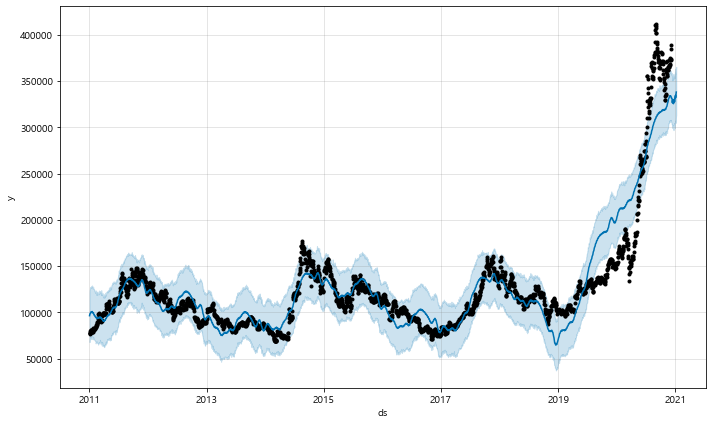

In [24]:

model.plot(forecast);

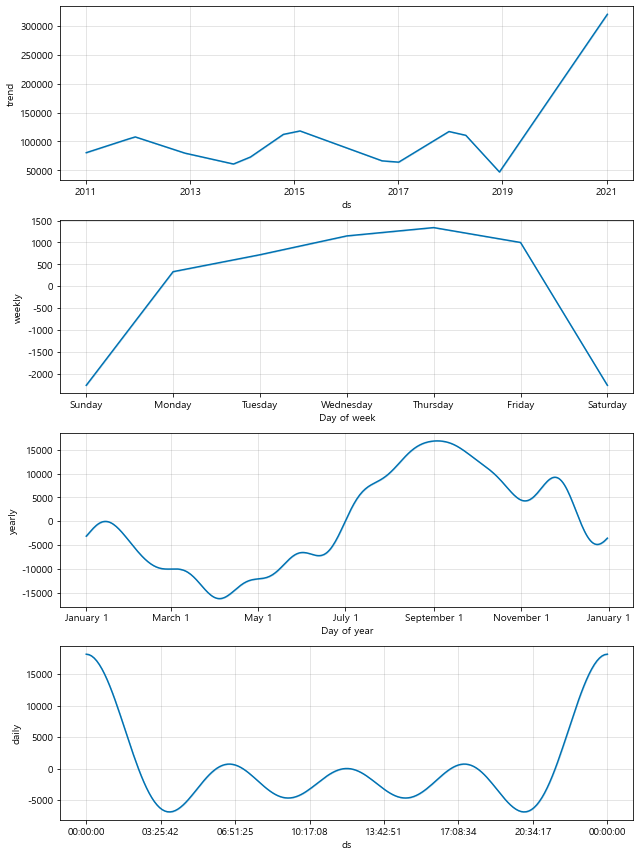

In [25]:
model.plot_components(forecast);

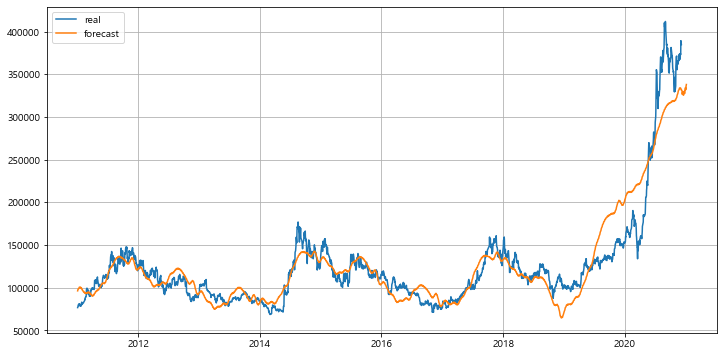

In [26]:
plt.figure(figsize=(12,6))
plt.plot(kakao.index, kakao.Close, label='real')
plt.plot(forecast.ds, forecast.yhat, label='forecast')
plt.grid()
plt.legend()
plt.show()

나노신소재:코스닥

In [49]:
start = datetime(2011, 2, 1)
end = datetime(2020, 12, 7)
nano = pdr.DataReader('121600.KQ', data_source='yahoo', start=start, end=end)
nano.head()

High          Low          Open         Close     Volume  \
Date                                                                           
2011-02-09  11866.700195  9966.669922  11700.000000   9966.669922  6221589.0   
2011-02-10  11033.299805  9966.669922  10200.000000  10400.000000  2775450.0   
2011-02-11  10633.299805  9400.000000  10500.000000   9700.000000  1164471.0   
2011-02-14  10366.700195  9666.669922   9866.669922   9866.669922   727749.0   
2011-02-15   9966.669922  9366.669922   9866.669922   9366.669922   658632.0   

               Adj Close  
Date                      
2011-02-09   9682.387695  
2011-02-10  10103.358398  
2011-02-11   9423.324219  
2011-02-14   9585.239258  
2011-02-15   9099.501953

In [50]:
nano.tail()
#2018년2월부터,2020년12월4일까지의 자료가 없다..

High      Low     Open    Close    Volume  Adj Close
Date                                                               
2018-01-26  21300.0  20500.0  21300.0  21050.0   89726.0    21050.0
2018-01-29  21250.0  20350.0  21250.0  20600.0  169169.0    20600.0
2018-01-30  20700.0  19750.0  20600.0  20000.0  177107.0    20000.0
2018-01-31  20000.0  19450.0  19700.0  19900.0   76679.0    19900.0
2020-12-07  35150.0  33800.0  34800.0  35050.0  177872.0    35050.0

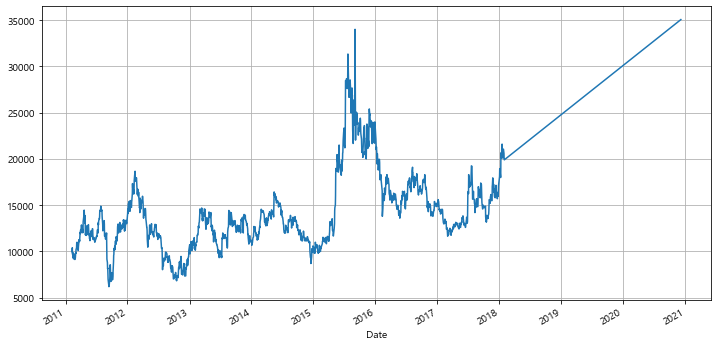

In [51]:

nano.Close.plot(figsize=(12,6), grid=True)
plt.show()

In [52]:
nano_trunc = nano[:'2017-06-30']
nano_trunc.tail()
#지나간 자료의 예측과 실제가 맞는지 분석해보자~

High      Low     Open    Close     Volume  Adj Close
Date                                                                
2017-06-26  13800.0  13000.0  13800.0  13050.0   146849.0    13050.0
2017-06-27  13250.0  12700.0  13050.0  13100.0   112487.0    13100.0
2017-06-28  13250.0  12900.0  13200.0  13250.0    86360.0    13250.0
2017-06-29  15900.0  13100.0  13250.0  15400.0  1334860.0    15400.0
2017-06-30  16300.0  15300.0  15550.0  16150.0   667313.0    16150.0

In [53]:
df = pd.DataFrame({'ds': nano_trunc.index, 'y': nano_trunc.Close})
df.reset_index(inplace=True)
del df['Date']
df.head()

ds             y
0 2011-02-09   9966.669922
1 2011-02-10  10400.000000
2 2011-02-11   9700.000000
3 2011-02-14   9866.669922
4 2011-02-15   9366.669922

In [54]:
model = Prophet(daily_seasonality=True)
model.fit(df)

In [57]:
future = model.make_future_dataframe(periods=215)
future.tail()

ds
1791 2018-01-27
1792 2018-01-28
1793 2018-01-29
1794 2018-01-30
1795 2018-01-31

In [58]:
forecast = model.predict(future)

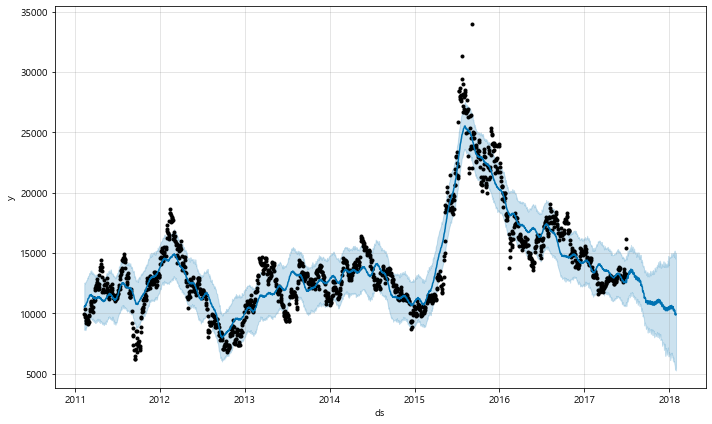

In [59]:
model.plot(forecast);

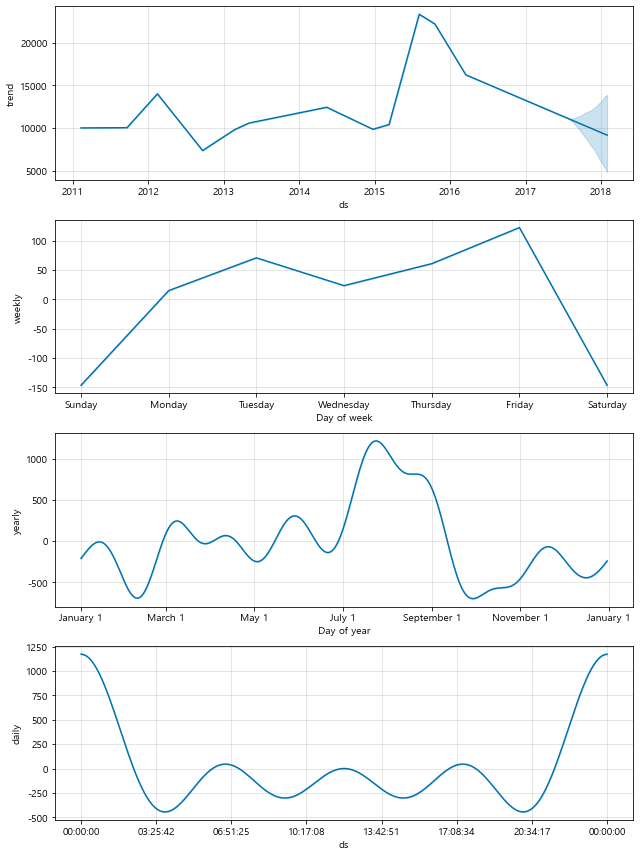

In [60]:

model.plot_components(forecast);

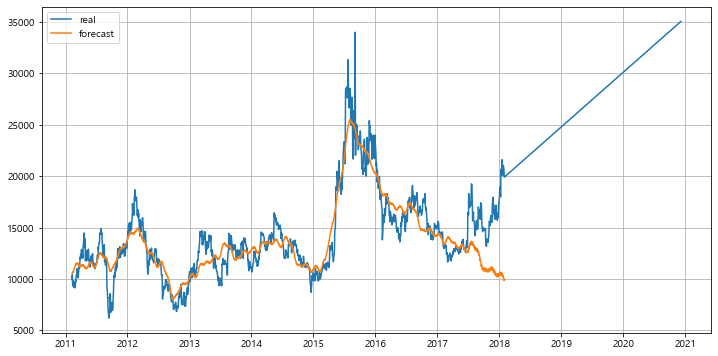

In [61]:
plt.figure(figsize=(12,6))
plt.plot(nano.index, nano.Close, label='real')
plt.plot(forecast.ds, forecast.yhat, label='forecast')
plt.grid()
plt.legend()
plt.show()

해외주식: 테슬라

In [62]:
start = datetime(2012, 1, 1)
end = datetime(2020, 12, 4)
tesla = pdr.DataReader('TSLA', data_source='yahoo', start=start, end=end)
tesla.head()

High    Low   Open  Close     Volume  Adj Close
Date                                                        
2012-01-03  5.900  5.530  5.788  5.616  4640500.0      5.616
2012-01-04  5.734  5.500  5.642  5.542  3150500.0      5.542
2012-01-05  5.586  5.370  5.552  5.424  5027500.0      5.424
2012-01-06  5.558  5.282  5.440  5.382  4931500.0      5.382
2012-01-09  5.498  5.224  5.400  5.450  4485000.0      5.450

In [63]:
tesla.tail()

High         Low        Open       Close      Volume  \
Date                                                                     
2020-11-30  607.799988  554.510010  602.210022  567.599976  63003100.0   
2020-12-01  597.849976  572.049988  597.590027  584.760010  40382800.0   
2020-12-02  571.539978  541.210022  556.440002  568.820007  47775700.0   
2020-12-03  598.969971  582.429993  590.020020  593.380005  42552000.0   
2020-12-04  599.039978  585.500000  591.010010  599.039978  29059200.0   

             Adj Close  
Date                    
2020-11-30  567.599976  
2020-12-01  584.760010  
2020-12-02  568.820007  
2020-12-03  593.380005  
2020-12-04  599.039978

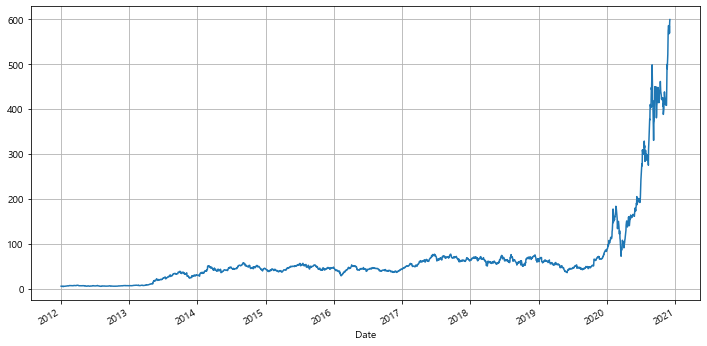

In [64]:
tesla.Close.plot(figsize=(12,6), grid=True)
plt.show()

In [65]:
tesla_trunc = tesla[:'2020-12-04']
tesla_trunc.tail()

High         Low        Open       Close      Volume  \
Date                                                                     
2020-11-30  607.799988  554.510010  602.210022  567.599976  63003100.0   
2020-12-01  597.849976  572.049988  597.590027  584.760010  40382800.0   
2020-12-02  571.539978  541.210022  556.440002  568.820007  47775700.0   
2020-12-03  598.969971  582.429993  590.020020  593.380005  42552000.0   
2020-12-04  599.039978  585.500000  591.010010  599.039978  29059200.0   

             Adj Close  
Date                    
2020-11-30  567.599976  
2020-12-01  584.760010  
2020-12-02  568.820007  
2020-12-03  593.380005  
2020-12-04  599.039978

In [66]:
df = pd.DataFrame({'ds': tesla_trunc.index, 'y': tesla_trunc.Close})
df.reset_index(inplace=True)
del df['Date']
df.head()

ds      y
0 2012-01-03  5.616
1 2012-01-04  5.542
2 2012-01-05  5.424
3 2012-01-06  5.382
4 2012-01-09  5.450

In [67]:
model = Prophet(daily_seasonality=True)
model.fit(df)

In [68]:
future = model.make_future_dataframe(periods=157)
future.tail()

ds
2399 2021-05-06
2400 2021-05-07
2401 2021-05-08
2402 2021-05-09
2403 2021-05-10

In [69]:

forecast = model.predict(future)

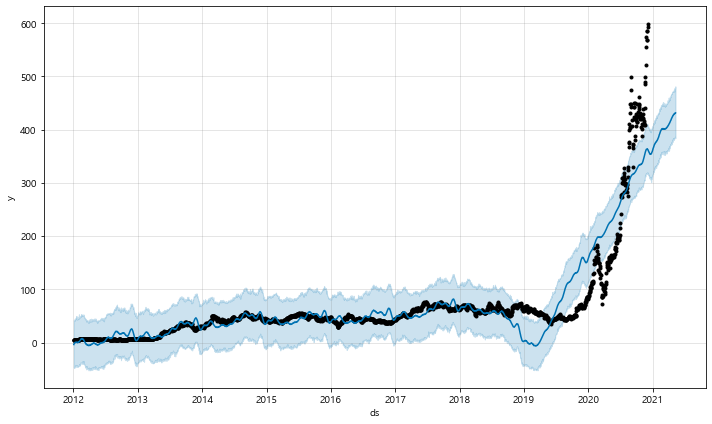

In [70]:
model.plot(forecast);

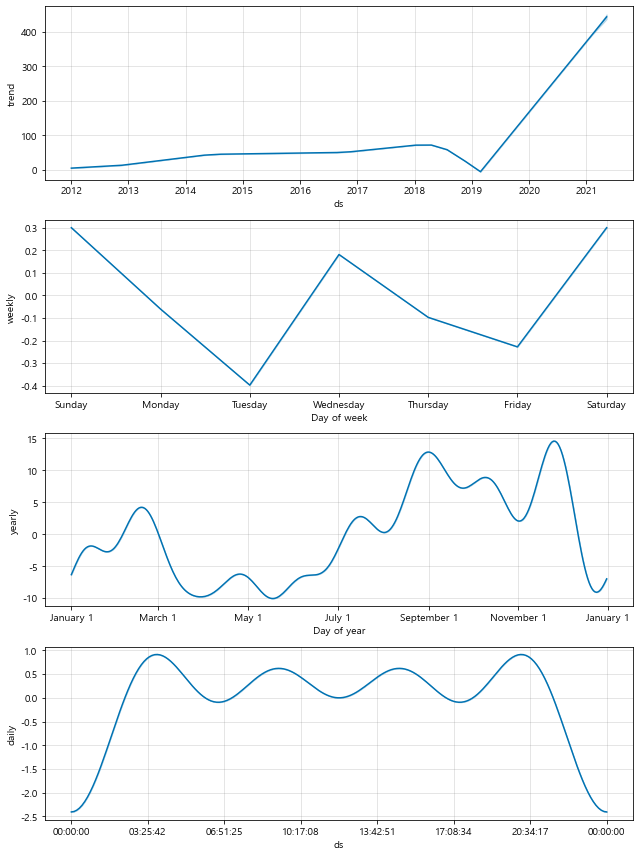

In [71]:
model.plot_components(forecast);

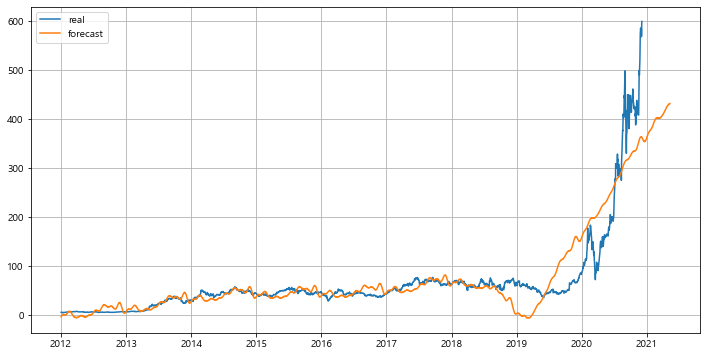

In [72]:
plt.figure(figsize=(12,6))
plt.plot(tesla.index, tesla.Close, label='real')
plt.plot(forecast.ds, forecast.yhat, label='forecast')
plt.grid()
plt.legend()
plt.show()

구글

In [73]:
google = pdr.DataReader('GOOGL', data_source='yahoo', start=start, end=end)
google.tail()

High          Low         Open        Close     Volume  \
Date                                                                        
2020-11-30  1780.339966  1747.839966  1775.650024  1754.400024  1620900.0   
2020-12-01  1821.719971  1763.030029  1766.660034  1795.359985  1868100.0   
2020-12-02  1832.739990  1785.170044  1795.359985  1824.969971  1471200.0   
2020-12-03  1843.829956  1817.000000  1820.540039  1821.839966  1236400.0   
2020-12-04  1829.500000  1813.589966  1820.219971  1823.760010  1015300.0   

              Adj Close  
Date                     
2020-11-30  1754.400024  
2020-12-01  1795.359985  
2020-12-02  1824.969971  
2020-12-03  1821.839966  
2020-12-04  1823.760010

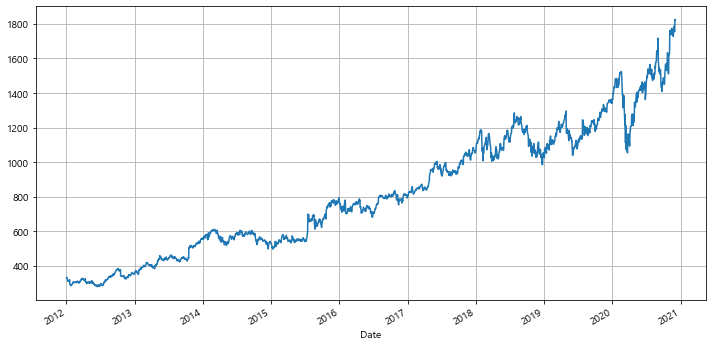

In [74]:
google.Close.plot(figsize=(12,6), grid=True)
plt.show()

In [100]:
google_trunc = google[:'2020-12-04']
google_trunc.tail()

High          Low         Open        Close     Volume  \
Date                                                                        
2020-11-30  1780.339966  1747.839966  1775.650024  1754.400024  1620900.0   
2020-12-01  1821.719971  1763.030029  1766.660034  1795.359985  1868100.0   
2020-12-02  1832.739990  1785.170044  1795.359985  1824.969971  1471200.0   
2020-12-03  1843.829956  1817.000000  1820.540039  1821.839966  1236400.0   
2020-12-04  1829.500000  1813.589966  1820.219971  1823.760010  1015300.0   

              Adj Close  
Date                     
2020-11-30  1754.400024  
2020-12-01  1795.359985  
2020-12-02  1824.969971  
2020-12-03  1821.839966  
2020-12-04  1823.760010

In [101]:

df = pd.DataFrame({'ds': google_trunc.index, 'y': google_trunc.Close})
df.reset_index(inplace=True)
del df['Date']
df.head()

ds           y
0 2012-01-03  333.038025
1 2012-01-04  334.474487
2 2012-01-05  329.834839
3 2012-01-06  325.335327
4 2012-01-09  311.541534

In [102]:
model = Prophet(daily_seasonality=True)
model.fit(df)

In [103]:
future = model.make_future_dataframe(periods=157)
future.tail()

ds
2399 2021-05-06
2400 2021-05-07
2401 2021-05-08
2402 2021-05-09
2403 2021-05-10

In [104]:

forecast = model.predict(future)

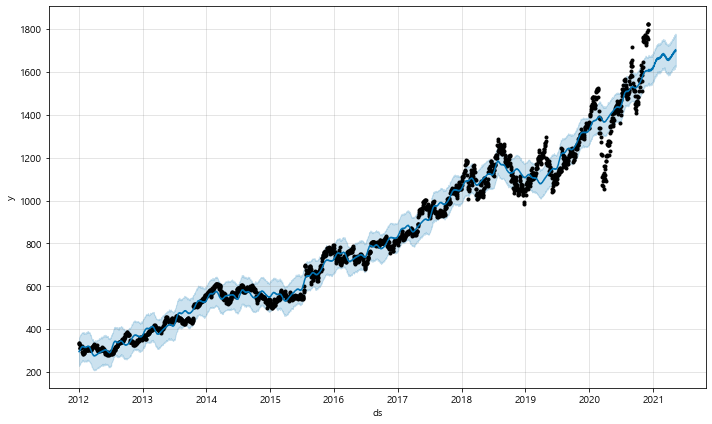

In [105]:
model.plot(forecast);

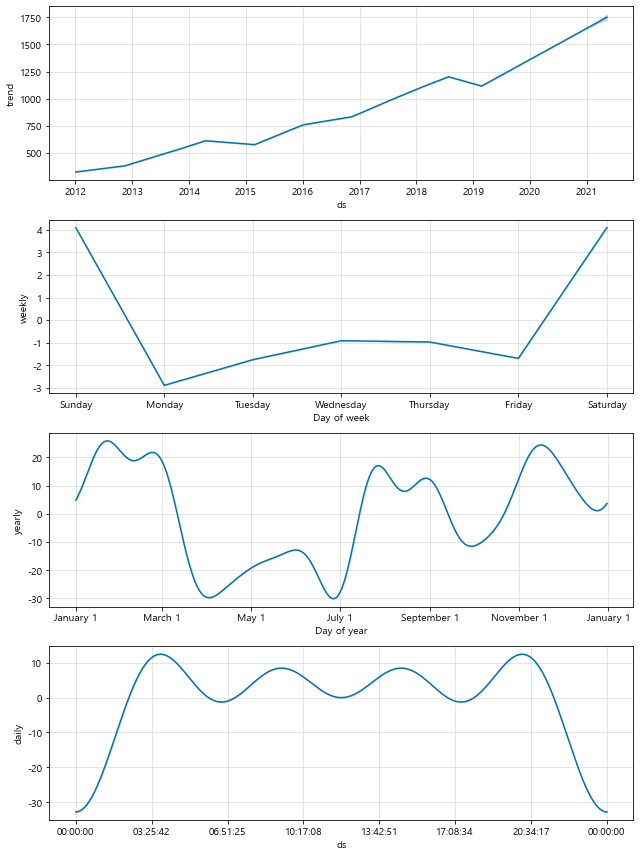

In [106]:

model.plot_components(forecast);

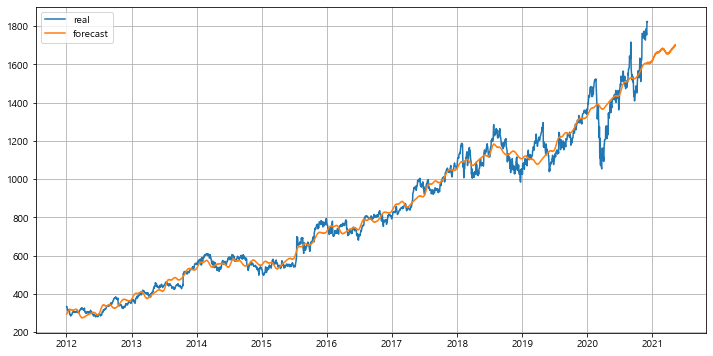

In [107]:

plt.figure(figsize=(12,6))
plt.plot(google.index, google.Close, label='real')
plt.plot(forecast.ds, forecast.yhat, label='forecast')
plt.grid()
plt.legend()
plt.show()

현대차 :코스피

In [89]:
start = datetime(2013, 1, 1)
end = datetime(2020, 12, 7)
hc = pdr.DataReader('005380.KS', data_source='yahoo', start=start, end=end)
hc.head()

High       Low      Open     Close     Volume     Adj Close
Date                                                                       
2013-01-02  220500.0  215000.0  220500.0  216000.0   696026.0  187619.31250
2013-01-03  216500.0  202500.0  216000.0  206000.0  1758280.0  178933.25000
2013-01-04  207500.0  202500.0  204500.0  206000.0  1026707.0  178933.25000
2013-01-07  209500.0  205500.0  205500.0  208500.0   775886.0  181104.78125
2013-01-08  212500.0  208500.0  209000.0  210000.0   539799.0  182407.68750

In [90]:
hc.tail()

High       Low      Open     Close     Volume  Adj Close
Date                                                                    
2020-12-01  184500.0  179500.0  183000.0  183500.0  1792800.0   183500.0
2020-12-02  184500.0  181500.0  183500.0  182500.0  1745795.0   182500.0
2020-12-03  196500.0  182000.0  183500.0  196500.0  6053809.0   196500.0
2020-12-04  199000.0  195000.0  198000.0  196500.0  3224702.0   196500.0
2020-12-07  198500.0  190500.0  195500.0  193500.0  2492665.0   193500.0

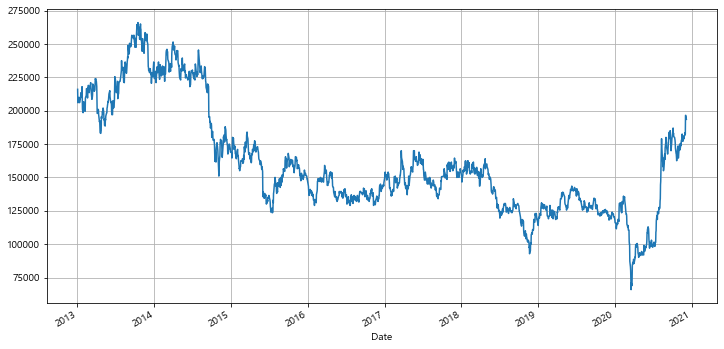

In [91]:
hc.Close.plot(figsize=(12,6), grid=True)
plt.show()

In [92]:
hc_trunc = hc[:'2020-12-07']
hc_trunc.tail()

High       Low      Open     Close     Volume  Adj Close
Date                                                                    
2020-12-01  184500.0  179500.0  183000.0  183500.0  1792800.0   183500.0
2020-12-02  184500.0  181500.0  183500.0  182500.0  1745795.0   182500.0
2020-12-03  196500.0  182000.0  183500.0  196500.0  6053809.0   196500.0
2020-12-04  199000.0  195000.0  198000.0  196500.0  3224702.0   196500.0
2020-12-07  198500.0  190500.0  195500.0  193500.0  2492665.0   193500.0

In [93]:
df = pd.DataFrame({'ds': hc_trunc.index, 'y': hc_trunc.Close})
df.reset_index(inplace=True)
del df['Date']
df.head()

ds         y
0 2013-01-02  216000.0
1 2013-01-03  206000.0
2 2013-01-04  206000.0
3 2013-01-07  208500.0
4 2013-01-08  210000.0

In [94]:
model = Prophet(daily_seasonality=True)
model.fit(df)

In [95]:

future = model.make_future_dataframe(periods=157)
future.tail()

ds
2097 2021-05-09
2098 2021-05-10
2099 2021-05-11
2100 2021-05-12
2101 2021-05-13

In [96]:
forecast = model.predict(future)

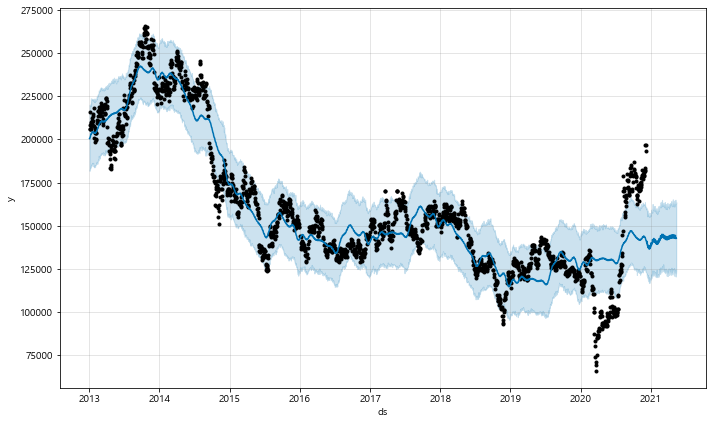

In [97]:
model.plot(forecast);

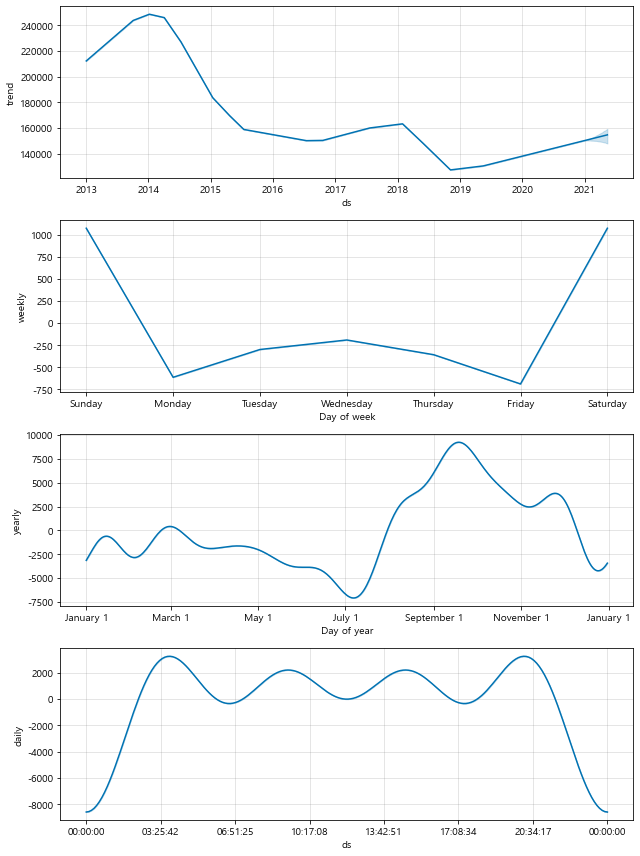

In [98]:

model.plot_components(forecast);

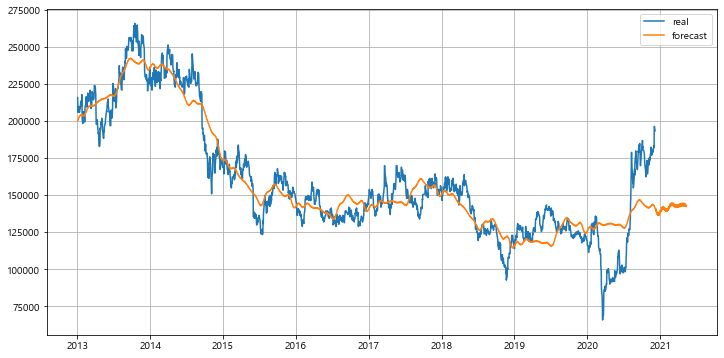

In [99]:

plt.figure(figsize=(12,6))
plt.plot(hc.index, hc.Close, label='real')
plt.plot(forecast.ds, forecast.yhat, label='forecast')
plt.grid()
plt.legend()
plt.show()